In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
#Setting Random Seed for Repordicability
np.random.seed(42)

In [ ]:
# -----------------------------
# STEP 1: Set Experiment Parameters
# -----------------------------

# Set a random seed for reproducibility (so we get the same random results every time)
np.random.seed(42)

# Sample sizes for A and B (large enough for CLT to hold)
n_A = 1000  # Sample size for Email A (control)
n_B = 1000  # Sample size for Email B (variant)

# True conversion rates (probabilities of success)
p_A = 0.10  # Email A true conversion rate
p_B = 0.13  # Email B true conversion rate

In [ ]:
# -----------------------------
# STEP 2: Simulate Binary Data
# -----------------------------

# Simulate outcomes: 1 for success, 0 for failure
# Each user is a Bernoulli trial
group_A = np.random.binomial(1, p_A, n_A)
group_B = np.random.binomial(1, p_B, n_B)

In [ ]:
# -----------------------------
# STEP 3: Calculate Sample Proportions
# -----------------------------

# Proportion of conversions in each group (sample means)
p_hat_A = np.mean(group_A)
p_hat_B = np.mean(group_B)
p_hat_A, p_hat_B

(np.float64(0.1), np.float64(0.131))

In [ ]:
##Assuming H0 holds true, Both samples came from the same population
# -----------------------------
# STEP 4: Compute Pooled Proportion
# -----------------------------

# Under H0 (no difference), we pool the successes and compute overall proportion
p_pooled = (group_A.sum() + group_B.sum()) / (n_A + n_B)

# -----------------------------
# STEP 5: Compute Standard Error
# -----------------------------

# Formula for SE of difference between two proportions under H0
SE = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_A + 1/n_B))
p_pooled, SE

(np.float64(0.1155), np.float64(0.014294037218364865))

In [ ]:
# -----------------------------
# STEP 6: Compute Z-Statistic
# -----------------------------

# How many standard errors away the observed difference is
z_stat = (p_hat_B - p_hat_A) / SE
z_stat

np.float64(2.1687364826622564)

In [ ]:
# -----------------------------
# STEP 7: Compute One-tailed P-Value
# -----------------------------

# Probability of observing a z this extreme or more under H0
p_value = 1 - norm.cdf(z_stat)
p_value

np.float64(0.015051347963662254)

In [ ]:
# -----------------------------
# STEP 8: Plotting the Normal Curve
# -----------------------------

# x-axis values from -4 to +4 standard deviations
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)  # Standard normal PDF

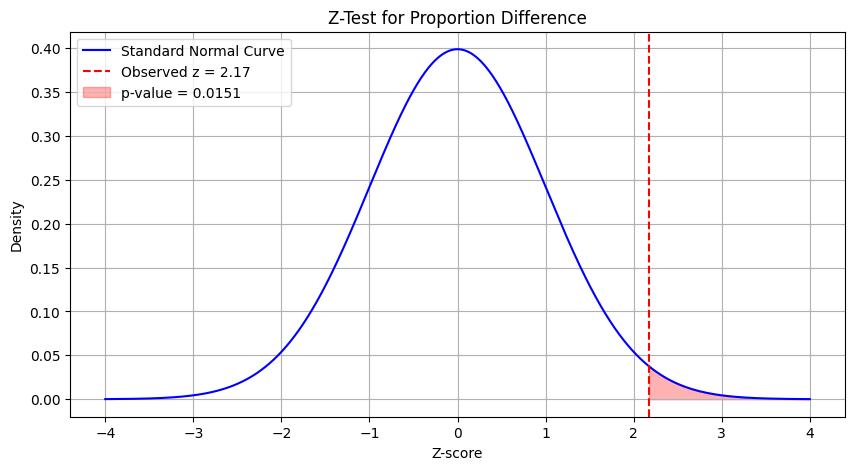

In [ ]:
# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Standard Normal Curve', color='blue')
plt.axvline(z_stat, color='red', linestyle='--', label=f'Observed z = {z_stat:.2f}')
plt.fill_between(x, y, where=(x >= z_stat), color='red', alpha=0.3, label=f'p-value = {p_value:.4f}')
plt.title('Z-Test for Proportion Difference')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# -----------------------------
# STEP 9: Print Summary
# -----------------------------

summary = {
    "Sample Proportion A (p̂_A)": round(p_hat_A, 4),
    "Sample Proportion B (p̂_B)": round(p_hat_B, 4),
    "Pooled Proportion (p̂_pooled)": round(p_pooled, 4),
    "Standard Error": round(SE, 4),
    "Z-Statistic": round(z_stat, 4),
    "One-tailed P-Value": round(p_value, 4)
}

summary

{'Sample Proportion A (p̂_A)': np.float64(0.1),
 'Sample Proportion B (p̂_B)': np.float64(0.131),
 'Pooled Proportion (p̂_pooled)': np.float64(0.1155),
 'Standard Error': np.float64(0.0143),
 'Z-Statistic': np.float64(2.1687),
 'One-tailed P-Value': np.float64(0.0151)}

## One proportion Z-Test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, wilcoxon, kruskal
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

print("🧪 HYPOTHESIS TESTING MASTERCLASS")
print("=" * 50)
print("Building Statistical Intuition for Data Science Interviews")
print("=" * 50)

🧪 HYPOTHESIS TESTING MASTERCLASS
Building Statistical Intuition for Data Science Interviews



1️⃣  ONE-PROPORTION Z-TEST

🎯 USE CASE: Compare a sample proportion to a known population proportion
📊 EXAMPLE: Is our website conversion rate significantly different from 5%?

🧮 FORMULA: Z = (p̂ - p₀) / √[p₀(1 - p₀)/n]
💡 INTUITION: How many standard errors away is our sample proportion from the expected?

📊 EXAMPLE RESULTS:
   Sample size: 1000
   Conversions: 67
   Sample proportion: 0.0670
   Expected proportion: 0.05
   Z-statistic: 2.4666
   P-value: 0.0136
   Conclusion: Reject H₀


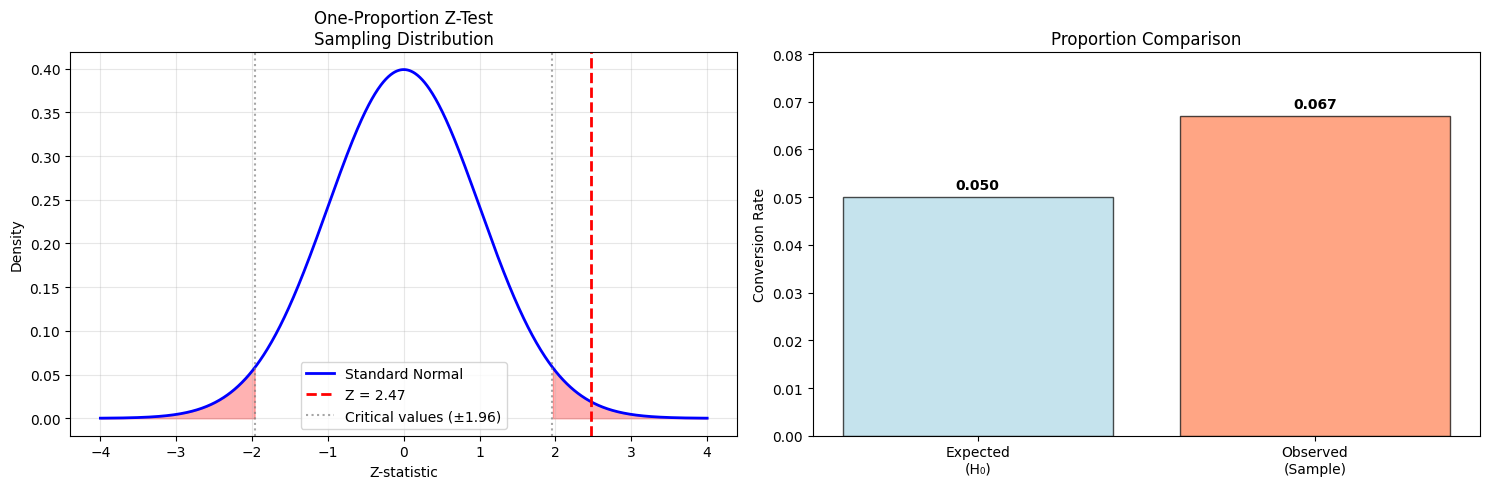

In [2]:
# =============================================================================
# 1. ONE-PROPORTION Z-TEST
# =============================================================================

print("\n" + "="*60)
print("1️⃣  ONE-PROPORTION Z-TEST")
print("="*60)

print("""
🎯 USE CASE: Compare a sample proportion to a known population proportion
📊 EXAMPLE: Is our website conversion rate significantly different from 5%?

🧮 FORMULA: Z = (p̂ - p₀) / √[p₀(1 - p₀)/n]
💡 INTUITION: How many standard errors away is our sample proportion from the expected?
""")

# Example: Website conversion rate
np.random.seed(42)
n_visitors = 1000
true_conversion = 0.07  # True rate is 7%
expected_conversion = 0.05  # We expect 5%

# Simulate data
conversions = np.random.binomial(n_visitors, true_conversion)
sample_prop = conversions / n_visitors

# Calculate Z-test
z_stat = (sample_prop - expected_conversion) / np.sqrt(expected_conversion * (1 - expected_conversion) / n_visitors)
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"📊 EXAMPLE RESULTS:")
print(f"   Sample size: {n_visitors}")
print(f"   Conversions: {conversions}")
print(f"   Sample proportion: {sample_prop:.4f}")
print(f"   Expected proportion: {expected_conversion}")
print(f"   Z-statistic: {z_stat:.4f}")
print(f"   P-value: {p_value:.4f}")
print(f"   Conclusion: {'Reject H₀' if p_value < 0.05 else 'Fail to reject H₀'}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Sampling distribution
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)
ax1.plot(x, y, 'b-', linewidth=2, label='Standard Normal')
ax1.axvline(z_stat, color='red', linestyle='--', linewidth=2, label=f'Z = {z_stat:.2f}')
ax1.axvline(-1.96, color='gray', linestyle=':', alpha=0.7, label='Critical values (±1.96)')
ax1.axvline(1.96, color='gray', linestyle=':', alpha=0.7)
ax1.fill_between(x[x <= -1.96], y[x <= -1.96], alpha=0.3, color='red')
ax1.fill_between(x[x >= 1.96], y[x >= 1.96], alpha=0.3, color='red')
ax1.set_title('One-Proportion Z-Test\nSampling Distribution')
ax1.set_xlabel('Z-statistic')
ax1.set_ylabel('Density')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Proportion comparison
categories = ['Expected\n(H₀)', 'Observed\n(Sample)']
proportions = [expected_conversion, sample_prop]
colors = ['lightblue', 'coral']
bars = ax2.bar(categories, proportions, color=colors, alpha=0.7, edgecolor='black')
ax2.set_title('Proportion Comparison')
ax2.set_ylabel('Conversion Rate')
ax2.set_ylim(0, max(proportions) * 1.2)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{proportions[i]:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


2️⃣  TWO-PROPORTION Z-TEST

🎯 USE CASE: Compare proportions from two independent groups
📊 EXAMPLE: A/B test - does the new webpage design have a higher conversion rate?

🧮 FORMULA: Z = (p̂₁ - p̂₂) / √[p̂(1 - p̂)(1/n₁ + 1/n₂)]
💡 INTUITION: Are the two proportions different beyond what random variation would explain?

📊 A/B TEST RESULTS:
   Group A: 28/500 = 0.0560
   Group B: 39/500 = 0.0780
   Pooled proportion: 0.0670
   Z-statistic: -1.3913
   P-value: 0.1641
   Conclusion: No significant difference


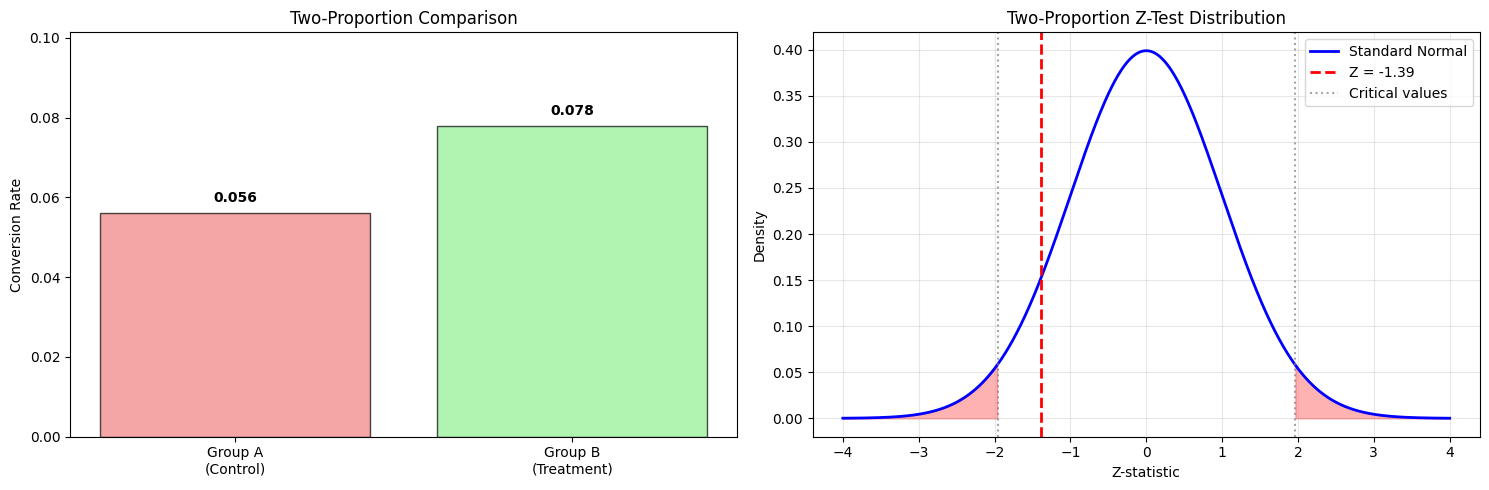

In [3]:
# =============================================================================
# 2. TWO-PROPORTION Z-TEST
# =============================================================================

print("\n" + "="*60)
print("2️⃣  TWO-PROPORTION Z-TEST")
print("="*60)

print("""
🎯 USE CASE: Compare proportions from two independent groups
📊 EXAMPLE: A/B test - does the new webpage design have a higher conversion rate?

🧮 FORMULA: Z = (p̂₁ - p̂₂) / √[p̂(1 - p̂)(1/n₁ + 1/n₂)]
💡 INTUITION: Are the two proportions different beyond what random variation would explain?
""")

# Example: A/B test for two webpage designs
n1, n2 = 500, 500  # Sample sizes
p1_true, p2_true = 0.05, 0.08  # True conversion rates

# Simulate data
conversions1 = np.random.binomial(n1, p1_true)
conversions2 = np.random.binomial(n2, p2_true)
p1_hat = conversions1 / n1
p2_hat = conversions2 / n2

# Pooled proportion
p_pooled = (conversions1 + conversions2) / (n1 + n2)

# Calculate Z-test
z_stat_2prop = (p1_hat - p2_hat) / np.sqrt(p_pooled * (1 - p_pooled) * (1/n1 + 1/n2))
p_value_2prop = 2 * (1 - stats.norm.cdf(abs(z_stat_2prop)))

print(f"📊 A/B TEST RESULTS:")
print(f"   Group A: {conversions1}/{n1} = {p1_hat:.4f}")
print(f"   Group B: {conversions2}/{n2} = {p2_hat:.4f}")
print(f"   Pooled proportion: {p_pooled:.4f}")
print(f"   Z-statistic: {z_stat_2prop:.4f}")
print(f"   P-value: {p_value_2prop:.4f}")
print(f"   Conclusion: {'Group B significantly better' if z_stat_2prop < -1.96 else 'No significant difference'}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Comparison of proportions
groups = ['Group A\n(Control)', 'Group B\n(Treatment)']
props = [p1_hat, p2_hat]
colors = ['lightcoral', 'lightgreen']
bars = ax1.bar(groups, props, color=colors, alpha=0.7, edgecolor='black')
ax1.set_title('Two-Proportion Comparison')
ax1.set_ylabel('Conversion Rate')
ax1.set_ylim(0, max(props) * 1.3)
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.002,
             f'{props[i]:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Z-test distribution
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)
ax2.plot(x, y, 'b-', linewidth=2, label='Standard Normal')
ax2.axvline(z_stat_2prop, color='red', linestyle='--', linewidth=2, label=f'Z = {z_stat_2prop:.2f}')
ax2.axvline(-1.96, color='gray', linestyle=':', alpha=0.7, label='Critical values')
ax2.axvline(1.96, color='gray', linestyle=':', alpha=0.7)
ax2.fill_between(x[x <= -1.96], y[x <= -1.96], alpha=0.3, color='red')
ax2.fill_between(x[x >= 1.96], y[x >= 1.96], alpha=0.3, color='red')
ax2.set_title('Two-Proportion Z-Test Distribution')
ax2.set_xlabel('Z-statistic')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


3️⃣  CHI-SQUARE TEST

🎯 USE CASE: Test independence between categorical variables
📊 EXAMPLE: Is there a relationship between gender and product preference?

🧮 FORMULA: χ² = Σ [(Observed - Expected)² / Expected]
💡 INTUITION: How much do observed counts deviate from what we'd expect if variables were independent?

📊 CONTINGENCY TABLE:
Product   A   B
Gender         
Female   60  90
Male     80  70

📊 CHI-SQUARE TEST RESULTS:
   Chi-square statistic: 4.8348
   P-value: 0.0279
   Degrees of freedom: 1
   Conclusion: Reject H₀ - Variables are dependent

📊 EXPECTED FREQUENCIES:
Product     A     B
Gender             
Female   70.0  80.0
Male     70.0  80.0


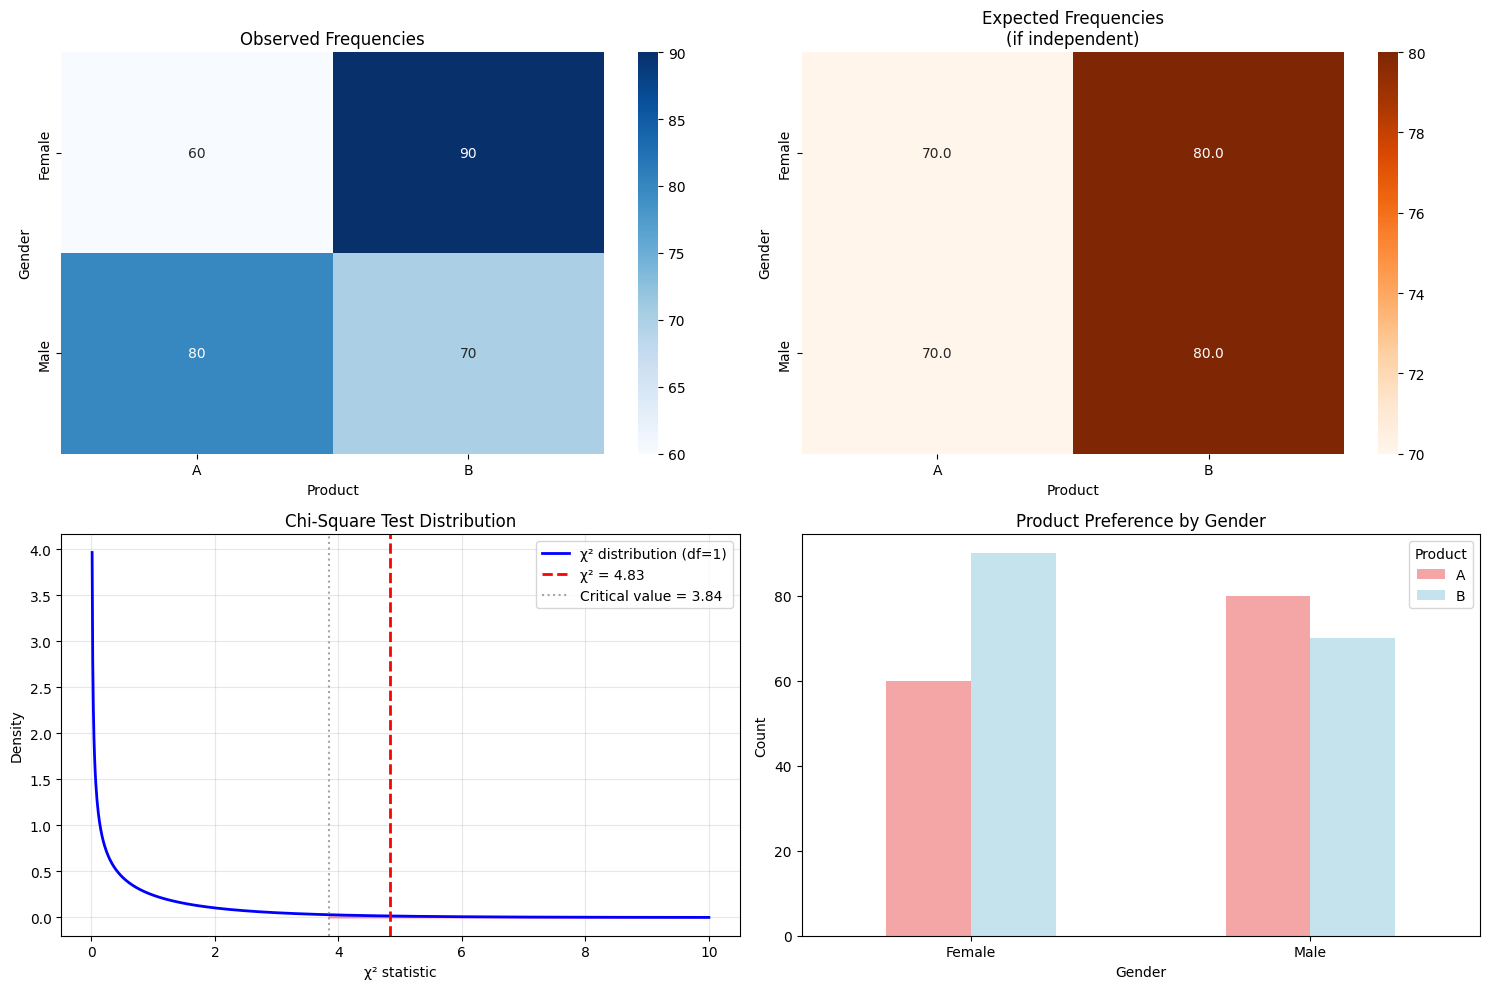

In [4]:
# =============================================================================
# 3. CHI-SQUARE TEST
# =============================================================================

print("\n" + "="*60)
print("3️⃣  CHI-SQUARE TEST")
print("="*60)

print("""
🎯 USE CASE: Test independence between categorical variables
📊 EXAMPLE: Is there a relationship between gender and product preference?

🧮 FORMULA: χ² = Σ [(Observed - Expected)² / Expected]
💡 INTUITION: How much do observed counts deviate from what we'd expect if variables were independent?
""")

# Example: Gender vs Product Preference
# Create contingency table
np.random.seed(42)
data = {
    'Gender': ['Male'] * 150 + ['Female'] * 150,
    'Product': (['A'] * 80 + ['B'] * 70) + (['A'] * 60 + ['B'] * 90)
}
df = pd.DataFrame(data)
contingency_table = pd.crosstab(df['Gender'], df['Product'])

print("📊 CONTINGENCY TABLE:")
print(contingency_table)
print()

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"📊 CHI-SQUARE TEST RESULTS:")
print(f"   Chi-square statistic: {chi2_stat:.4f}")
print(f"   P-value: {p_val:.4f}")
print(f"   Degrees of freedom: {dof}")
print(f"   Conclusion: {'Reject H₀ - Variables are dependent' if p_val < 0.05 else 'Fail to reject H₀ - Variables are independent'}")

print("\n📊 EXPECTED FREQUENCIES:")
expected_df = pd.DataFrame(expected,
                          index=contingency_table.index,
                          columns=contingency_table.columns)
print(expected_df)

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Observed frequencies heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Observed Frequencies')
ax1.set_ylabel('Gender')
ax1.set_xlabel('Product')

# Plot 2: Expected frequencies heatmap
sns.heatmap(expected_df, annot=True, fmt='.1f', cmap='Oranges', ax=ax2)
ax2.set_title('Expected Frequencies\n(if independent)')
ax2.set_ylabel('Gender')
ax2.set_xlabel('Product')

# Plot 3: Chi-square distribution
x = np.linspace(0, 10, 1000)
y = stats.chi2.pdf(x, dof)
ax3.plot(x, y, 'b-', linewidth=2, label=f'χ² distribution (df={dof})')
ax3.axvline(chi2_stat, color='red', linestyle='--', linewidth=2, label=f'χ² = {chi2_stat:.2f}')
critical_val = stats.chi2.ppf(0.95, dof)
ax3.axvline(critical_val, color='gray', linestyle=':', alpha=0.7, label=f'Critical value = {critical_val:.2f}')
ax3.fill_between(x[x >= critical_val], y[x >= critical_val], alpha=0.3, color='red')
ax3.set_title('Chi-Square Test Distribution')
ax3.set_xlabel('χ² statistic')
ax3.set_ylabel('Density')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Grouped bar chart
contingency_table.plot(kind='bar', ax=ax4, color=['lightcoral', 'lightblue'], alpha=0.7)
ax4.set_title('Product Preference by Gender')
ax4.set_ylabel('Count')
ax4.set_xlabel('Gender')
ax4.legend(title='Product')
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


4️⃣  ONE-SAMPLE T-TEST

🎯 USE CASE: Compare sample mean to a known population mean
📊 EXAMPLE: Is the average response time different from the target of 2 seconds?

🧮 FORMULA: t = (x̄ - μ₀) / (s / √n)
💡 INTUITION: How many standard errors away is our sample mean from the hypothesized mean?

📊 ONE-SAMPLE T-TEST RESULTS:
   Sample size: 30
   Sample mean: 2.5713 seconds
   Sample std: 1.2382 seconds
   Target mean: 2.0 seconds
   T-statistic: 2.5272
   P-value: 0.0172
   Conclusion: Reject H₀ - Mean is significantly different


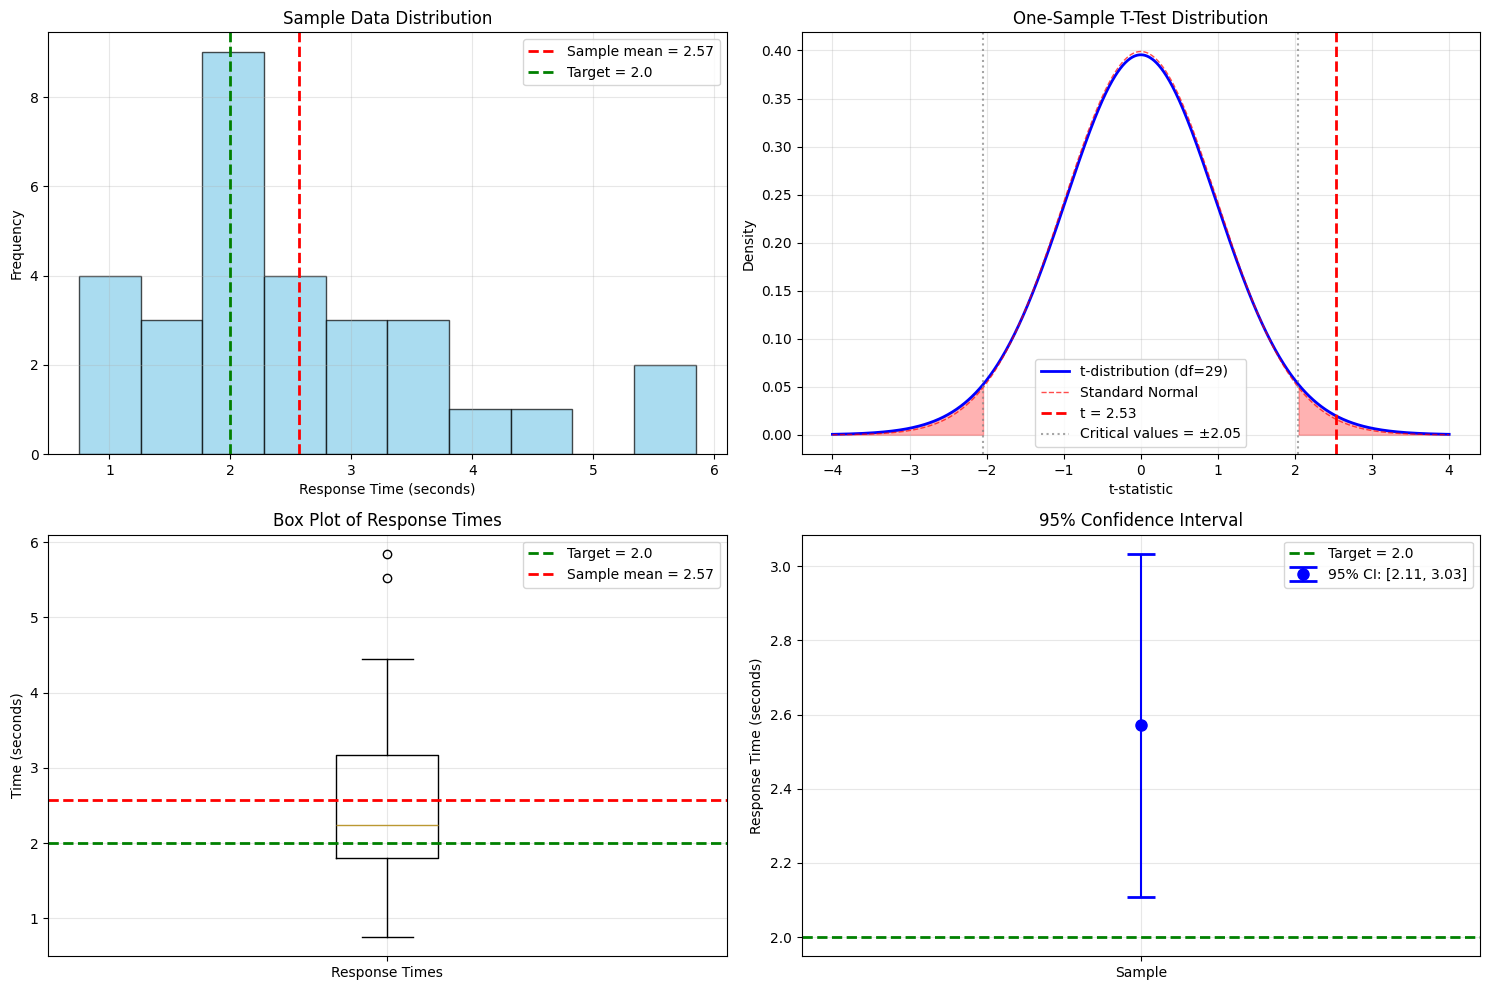

In [7]:
# =============================================================================
# 4. ONE-SAMPLE T-TEST
# =============================================================================

print("\n" + "="*60)
print("4️⃣  ONE-SAMPLE T-TEST")
print("="*60)

print("""
🎯 USE CASE: Compare sample mean to a known population mean
📊 EXAMPLE: Is the average response time different from the target of 2 seconds?

🧮 FORMULA: t = (x̄ - μ₀) / (s / √n)
💡 INTUITION: How many standard errors away is our sample mean from the hypothesized mean?
""")

# Example: Website response times
np.random.seed(42)
n = 30
target_time = 2.0  # Target response time in seconds
true_mean = 2.3    # True mean response time

# Generate sample data (slightly right-skewed)
response_times = np.random.gamma(2, 1.15, size=n) + 0.5
sample_mean = np.mean(response_times)
sample_std = np.std(response_times, ddof=1)

# Perform one-sample t-test
t_stat = (sample_mean - target_time) / (sample_std / np.sqrt(n))
p_value_t = 2 * (1 - stats.t.cdf(abs(t_stat), df=n-1))

print(f"📊 ONE-SAMPLE T-TEST RESULTS:")
print(f"   Sample size: {n}")
print(f"   Sample mean: {sample_mean:.4f} seconds")
print(f"   Sample std: {sample_std:.4f} seconds")
print(f"   Target mean: {target_time} seconds")
print(f"   T-statistic: {t_stat:.4f}")
print(f"   P-value: {p_value_t:.4f}")
print(f"   Conclusion: {'Reject H₀ - Mean is significantly different' if p_value_t < 0.05 else 'Fail to reject H₀'}")

# Visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Sample data histogram
ax1.hist(response_times, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(sample_mean, color='red', linestyle='--', linewidth=2, label=f'Sample mean = {sample_mean:.2f}')
ax1.axvline(target_time, color='green', linestyle='--', linewidth=2, label=f'Target = {target_time}')
ax1.set_title('Sample Data Distribution')
ax1.set_xlabel('Response Time (seconds)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: T-distribution
x = np.linspace(-4, 4, 1000)
y_t = stats.t.pdf(x, df=n-1)
y_norm = stats.norm.pdf(x, 0, 1)
ax2.plot(x, y_t, 'b-', linewidth=2, label=f't-distribution (df={n-1})')
ax2.plot(x, y_norm, 'r--', linewidth=1, alpha=0.7, label='Standard Normal')
ax2.axvline(t_stat, color='red', linestyle='--', linewidth=2, label=f't = {t_stat:.2f}')
critical_t = stats.t.ppf(0.975, df=n-1)
ax2.axvline(-critical_t, color='gray', linestyle=':', alpha=0.7, label=f'Critical values = ±{critical_t:.2f}')
ax2.axvline(critical_t, color='gray', linestyle=':', alpha=0.7)
ax2.fill_between(x[x <= -critical_t], y_t[x <= -critical_t], alpha=0.3, color='red')
ax2.fill_between(x[x >= critical_t], y_t[x >= critical_t], alpha=0.3, color='red')
ax2.set_title('One-Sample T-Test Distribution')
ax2.set_xlabel('t-statistic')
ax2.set_ylabel('Density')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Box plot
box_data = [response_times]
ax3.boxplot(box_data, labels=['Response Times'])
ax3.axhline(target_time, color='green', linestyle='--', linewidth=2, label=f'Target = {target_time}')
ax3.axhline(sample_mean, color='red', linestyle='--', linewidth=2, label=f'Sample mean = {sample_mean:.2f}')
ax3.set_title('Box Plot of Response Times')
ax3.set_ylabel('Time (seconds)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Confidence interval
margin_error = critical_t * (sample_std / np.sqrt(n))
ci_lower = sample_mean - margin_error
ci_upper = sample_mean + margin_error
ax4.errorbar(1, sample_mean, yerr=margin_error, fmt='o', capsize=10, capthick=2,
             color='blue', markersize=8, label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
ax4.axhline(target_time, color='green', linestyle='--', linewidth=2, label=f'Target = {target_time}')
ax4.set_title('95% Confidence Interval')
ax4.set_ylabel('Response Time (seconds)')
ax4.set_xlim(0.5, 1.5)
ax4.set_xticks([1])
ax4.set_xticklabels(['Sample'])
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
